#### Chapter 3 - Linear Regression

Q: Is there a relationship between advertising budget and sales?

A: TV advertising shows a linear pattern with the amount of money spent on advertising and sales. However, the relationship begins to less linear above the 200 mark with more outliars. 

Radio does show somewhat of a linear pattern but has consistent outliars, meaning non linear model might be able to capture this behaviour better but for the most part most of the majority population show a linear pattern. 

Newspaper is slightly more stochastic indiciting that increased marketing doesn't generally lead to increased sales and could be a lot more difficult to model based on the distribution of data.

Q: How strong is the relationship between advertising budget and sales?

A: The relationship for TV and Radio is strong but the newspaper shows a weak relationship.

Q: Which media are associated with sales?

A: TV and Radio with sales from the newspaper being the worst performing.

Q: How large is the association between each medium and sales?

A: Radio shows a greater association with the majority of the population demonstrating a linear pattern with advertising. This is followed to some degree by TV but quickly rounds off and newspaper appears to be stochastic.

Q: How accurately can we predict the future sales?

A: Future sales for Radio and TV would likely provide better forecasts than for newspaper.

Q: Is the relationship linear?

A: Radio may suit a linear model well as well as TV. but TV may benefit from a more flexible model to capture to increased distribution as the expendature for advertising increases. Newspaper is not linear.

Q: Is there synergy among the advertising media

A: This is difficult to determine due to the X axis for each graph having different figures.

### Lab: Linear Regression

In [198]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [199]:
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm as ANOVA

In [200]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [201]:
dir()

['A',
 'ANOVA',
 'Boston',
 'In',
 'MS',
 'Out',
 'VIF',
 'X',
 '_',
 '_100',
 '_107',
 '_108',
 '_109',
 '_11',
 '_110',
 '_111',
 '_112',
 '_114',
 '_115',
 '_116',
 '_117',
 '_118',
 '_119',
 '_12',
 '_120',
 '_121',
 '_122',
 '_13',
 '_130',
 '_131',
 '_132',
 '_133',
 '_134',
 '_135',
 '_137',
 '_138',
 '_139',
 '_14',
 '_140',
 '_141',
 '_142',
 '_143',
 '_144',
 '_145',
 '_149',
 '_15',
 '_154',
 '_155',
 '_156',
 '_157',
 '_158',
 '_159',
 '_161',
 '_162',
 '_163',
 '_164',
 '_165',
 '_166',
 '_167',
 '_168',
 '_169',
 '_176',
 '_177',
 '_178',
 '_179',
 '_180',
 '_181',
 '_183',
 '_184',
 '_185',
 '_186',
 '_187',
 '_188',
 '_189',
 '_190',
 '_191',
 '_196',
 '_20',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_27',
 '_28',
 '_29',
 '_30',
 '_31',
 '_36',
 '_37',
 '_38',
 '_39',
 '_4',
 '_40',
 '_41',
 '_43',
 '_44',
 '_45',
 '_46',
 '_47',
 '_5',
 '_50',
 '_51',
 '_52',
 '_54',
 '_58',
 '_6',
 '_63',
 '_64',
 '_65',
 '_66',
 '_67',
 '_68',
 '_7',
 '_70',
 '_71',
 '_72',
 '_73',


In [202]:
A = np.array([3, 5 ,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [203]:
A.sum()

19

### Simple Linear Regression

In [204]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [205]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [206]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [207]:
y = Boston['medv']
model = sm.OLS
results = model(y, X).fit()

In [208]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [209]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [210]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [211]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           5.08e-88
Time:                        10:07:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [213]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [214]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [215]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [216]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [217]:
def abline(ax, b, m):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.plot(xlim, ylim)

In [218]:
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_18427/563228958.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_18427/563228958.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


AttributeError: Line2D.set() got an unexpected keyword argument 'linewidt'

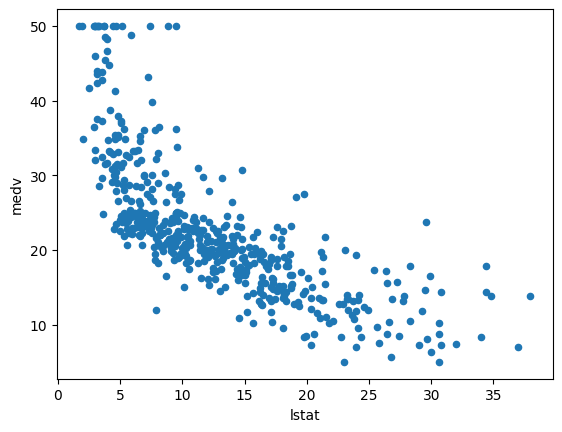

In [219]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidt=3)

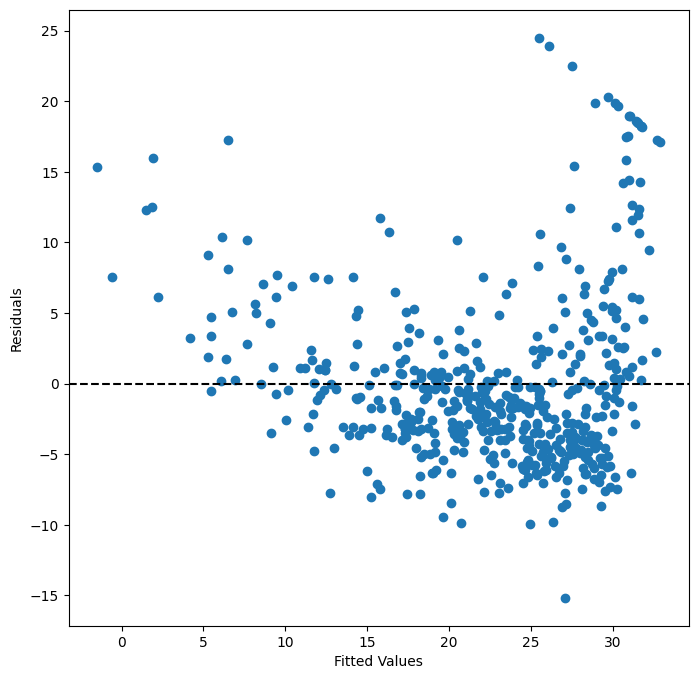

In [58]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')

374

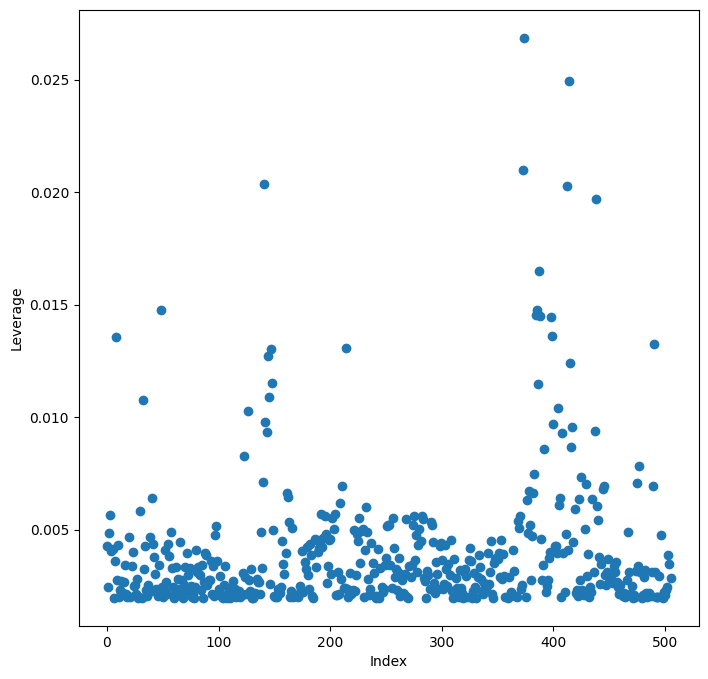

In [149]:
infl = results.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)


### Multiple Linear Regression

In [221]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [222]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [223]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [224]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


### Multivariate Goodness of Fit

In [225]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [226]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))

### Interaction Terms

In [230]:
X = MS(['lstat',
       'age',
       ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### Non-Linear Transformations of the Predictors

In [231]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [233]:
ANOVA(results, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11349.418808,0.0,NaN,NaN,NaN
1,502.0,14165.613251,-9.0,-2816.194443,11.0889,NaN


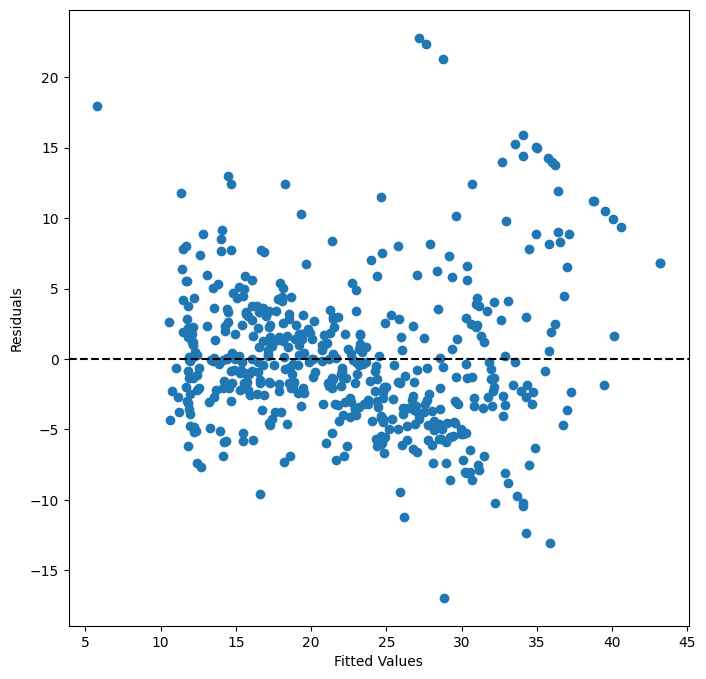

In [234]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')

### Qualitative Predictors

In [235]:
Carsets = load_data("Carseats")
Carsets.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [236]:
allvars = list(Carsets.columns.drop('Sales'))
y = Carsets['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carsets)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


### Exercises